# Training and Inference Code for AdBlocker YOLOV5

# Importing Libraries

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
%cd ..

/content


## Create a dataset.yaml file with details about the dataset

In [ ]:
f = open("dataset.yaml", "a")

f.write("train: /content/drive/MyDrive/mlcyberdata/trainvalid/images/training/\n")      #change to your training images path
f.write("val: /content/drive/MyDrive/mlcyberdata/trainvalid/images/validation/\n")      #change to your validation images path
f.write("nc: 1\n")
f.write("names: ['advertisement']\n")
f.close()

In [14]:
%cd yolov5

/content/yolov5


## Training Parameters:
## Image size: 640x640x3
## Batch size: 8
## Epochs: 300

In [ ]:
!python train.py --img 640 --batch 8 --epochs 300 --data /content/dataset.yaml --weights yolov5s.pt     #change to your dataset.yaml path

/content/yolov5
2023-12-09 21:13:50.071893: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-09 21:13:50.071943: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-09 21:13:50.071985: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=

## After Training and Inference part

### --weights /content/drive/MyDrive/mlcyberdata/best.pt - Replace with your best model path
### --source - Replace with your original test images path

In [ ]:
!python detect.py --weights /content/drive/MyDrive/mlcyberdata/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/mlcyberdata/page_based/web/test/images --save-txt --name orig

detect: weights=['/content/drive/MyDrive/mlcyberdata/best.pt'], source=/content/drive/MyDrive/mlcyberdata/page_based/web/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=orig, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/20 /content/drive/MyDrive/mlcyberdata/page_based/web/test/images/cnn.png: 352x640 1 advertisement, 58.1ms
image 2/20 /content/drive/MyDrive/mlcyberdata/page_based/web/test/images/cnn2.png: 352x640 1 advertisement, 7.5ms
image 3

### --source - Replace with your adblended test images path

In [ ]:
!python detect.py --weights /content/drive/MyDrive/mlcyberdata/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/mlcyberdata/adblending --save-txt --name adblend

detect: weights=['/content/drive/MyDrive/mlcyberdata/best.pt'], source=/content/drive/MyDrive/mlcyberdata/adblending, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=adblend, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /content/drive/MyDrive/mlcyberdata/adblending/cnn.png: 352x640 (no detections), 46.7ms
image 2/20 /content/drive/MyDrive/mlcyberdata/adblending/cnn2.png: 352x640 1 advertisement, 7.5ms
image 3/20 /content/drive/MyDrive/mlcyberdata/adblending/foxnews.png: 352x640 3 advertisements

### --source - Replace with your patch blended test images path

In [ ]:
!python detect.py --weights /content/drive/MyDrive/mlcyberdata/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/mlcyberdata/patch/images --save-txt --name patchblend

detect: weights=['/content/drive/MyDrive/mlcyberdata/best.pt'], source=/content/drive/MyDrive/mlcyberdata/patch/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=patchblend, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/20 /content/drive/MyDrive/mlcyberdata/patch/images/cnn.png: 352x640 1 advertisement, 46.3ms
image 2/20 /content/drive/MyDrive/mlcyberdata/patch/images/cnn2.png: 352x640 1 advertisement, 7.8ms
image 3/20 /content/drive/MyDrive/mlcyberda

### --source - Replace with your resized test images path

In [15]:
!python detect.py --weights /content/drive/MyDrive/mlcyberdata/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/mlcyberdata/resize/images --save-txt --name resize

detect: weights=['/content/drive/MyDrive/mlcyberdata/best.pt'], source=/content/drive/MyDrive/mlcyberdata/resize/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=resize, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/20 /content/drive/MyDrive/mlcyberdata/resize/images/cnn.png: 352x640 1 advertisement, 72.5ms
image 2/20 /content/drive/MyDrive/mlcyberdata/resize/images/cnn2.png: 352x640 (no detections), 7.9ms
image 3/20 /content/drive/MyDrive/mlcyberdat

### --source - Replace with your noise added test images path

In [ ]:
!python detect.py --weights /content/drive/MyDrive/mlcyberdata/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/mlcyberdata/noiseadd/images --save-txt --name noiseadd

detect: weights=['/content/drive/MyDrive/mlcyberdata/best.pt'], source=/content/drive/MyDrive/mlcyberdata/noiseadd/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=noiseadd, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /content/drive/MyDrive/mlcyberdata/noiseadd/images/cnn.png: 352x640 (no detections), 48.3ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/20 /content/drive/MyDrive/mlcyberdata/noiseadd/images/cnn2.png: 352x640 1 advertisement, 8.1ms
image 3/20 /content/drive/MyDrive/ml

### --source - Replace with your color shifted test images path

In [ ]:
!python detect.py --weights /content/drive/MyDrive/mlcyberdata/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/mlcyberdata/colorshift/images --save-txt --name colorshift

detect: weights=['/content/drive/MyDrive/mlcyberdata/best.pt'], source=/content/drive/MyDrive/mlcyberdata/colorshift/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=colorshift, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/20 /content/drive/MyDrive/mlcyberdata/colorshift/images/cnn.png: 352x640 1 advertisement, 46.4ms
image 2/20 /content/drive/MyDrive/mlcyberdata/colorshift/images/cnn2.png: 352x640 (no detections), 7.4ms
image 3/20 /content/drive/My

### --source - Replace with your blurred test images path

In [ ]:
!python detect.py --weights /content/drive/MyDrive/mlcyberdata/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/mlcyberdata/blur --save-txt --name blur

detect: weights=['/content/drive/MyDrive/mlcyberdata/best.pt'], source=/content/drive/MyDrive/mlcyberdata/blur, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=blur, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/20 /content/drive/MyDrive/mlcyberdata/blur/cnn.png: 352x640 1 advertisement, 79.1ms
image 2/20 /content/drive/MyDrive/mlcyberdata/blur/cnn2.png: 352x640 (no detections), 10.4ms
image 3/20 /content/drive/MyDrive/mlcyberdata/blur/foxnews.png: 352x640 

## Replace paths for results of all the attacks. Look at the comments.

In [ ]:
import os
import numpy as np

def read_txt(file_path):
    with open(file_path, 'r') as file:
        boxes = []
        for line in file:
            split_line = line.split()
            box = [float(item) for item in split_line[1:]]
            boxes.append(box)
    return np.array(boxes)

def iou(box1, box2):
    box1 = np.array([box1[0] - box1[2] / 2, box1[1] - box1[3] / 2,
                     box1[0] + box1[2] / 2, box1[1] + box1[3] / 2])
    box2 = np.array([box2[0] - box2[2] / 2, box2[1] - box2[3] / 2,
                     box2[0] + box2[2] / 2, box2[1] + box2[3] / 2])

    inter_area = max(0, min(box1[2], box2[2]) - max(box1[0], box2[0])) * \
                 max(0, min(box1[3], box2[3]) - max(box1[1], box2[1]))
    if inter_area == 0: return 0

    union_area = ((box1[2] - box1[0]) * (box1[3] - box1[1]) +
                  (box2[2] - box2[0]) * (box2[3] - box2[1]) -
                  inter_area)

    return inter_area / union_area

def evaluate_model(pred_dir, gt_dir, iou_threshold=0.5):
    true_positives, false_positives, false_negatives = 0, 0, 0
    all_ious = []

    detection_scores = []
    total_gt_boxes = 0

    for gt_file in os.listdir(gt_dir):
        gt_boxes = read_txt(os.path.join(gt_dir, gt_file))
        total_gt_boxes += len(gt_boxes)

        pred_file_path = os.path.join(pred_dir, gt_file)
        if os.path.exists(pred_file_path):
            pred_boxes = read_txt(pred_file_path)
        else:
            false_negatives += len(gt_boxes)
            continue

        for pred_box in pred_boxes:
          scores = [iou(pred_box, gt_box) for gt_box in gt_boxes]

          if scores:
              max_iou = max(scores)
              if max_iou >= iou_threshold:
                  true_positives += 1
                  all_ious.append(max_iou)
                  detection_scores.append((max_iou, 1))
                  gt_boxes = np.delete(gt_boxes, np.argmax(scores), 0)
              else:
                  false_positives += 1
                  detection_scores.append((max_iou, 0))
          else:
              false_positives += 1
              detection_scores.append((0, 0))


        false_negatives += len(gt_boxes)

    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    mean_iou = np.mean(all_ious) if all_ious else 0

    detection_scores.sort(key=lambda x: x[0], reverse=True)
    cumul_true_positives = 0
    precision_at_recall = []

    for score, is_tp in detection_scores:
        if is_tp:
            cumul_true_positives += 1
            precision_at_recall.append(cumul_true_positives / (cumul_true_positives + false_positives))

    map = np.mean(precision_at_recall) if precision_at_recall else 0

    return precision, recall, f1_score, mean_iou, map

#original test images path
predicted_dir = '/content/yolov5/runs/detect/orig/labels'
ground_truth_dir = '/content/drive/MyDrive/mlcyberdata/page_based/web/test/labels'

precision, recall, f1_score, mean_iou, map = evaluate_model(predicted_dir, ground_truth_dir)
print(f"ORIG ---- Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}, Mean IoU: {mean_iou:.4f}, mAP: {map:.4f}")

#ad blended images path
predicted_dir = '/content/yolov5/runs/detect/adblend/labels'
ground_truth_dir = '/content/drive/MyDrive/mlcyberdata/page_based/web/test/labels'

precision, recall, f1_score, mean_iou, map = evaluate_model(predicted_dir, ground_truth_dir)
print(f"ADBLEND ---- Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}, Mean IoU: {mean_iou:.4f}, mAP: {map:.4f}")

#patch blended images path
predicted_dir = '/content/yolov5/runs/detect/patchblend/labels'
ground_truth_dir = '/content/drive/MyDrive/mlcyberdata/page_based/web/test/labels'

precision, recall, f1_score, mean_iou, map = evaluate_model(predicted_dir, ground_truth_dir)
print(f"PATCHBLEND ---- Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}, Mean IoU: {mean_iou:.4f}, mAP: {map:.4f}")

#resized images path
predicted_dir = '/content/yolov5/runs/detect/resize/labels'
ground_truth_dir = '/content/drive/MyDrive/mlcyberdata/resize/labels'

precision, recall, f1_score, mean_iou, map = evaluate_model(predicted_dir, ground_truth_dir)
print(f"RESIZE ---- Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}, Mean IoU: {mean_iou:.4f}, mAP: {map:.4f}")

#noise added images path
predicted_dir = '/content/yolov5/runs/detect/noiseadd/labels'
ground_truth_dir = '/content/drive/MyDrive/mlcyberdata/page_based/web/test/labels'

precision, recall, f1_score, mean_iou, map = evaluate_model(predicted_dir, ground_truth_dir)
print(f"NOISEADD ---- Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}, Mean IoU: {mean_iou:.4f}, mAP: {map:.4f}")

#color shifted images path
predicted_dir = '/content/yolov5/runs/detect/colorshift/labels'
ground_truth_dir = '/content/drive/MyDrive/mlcyberdata/page_based/web/test/labels'

precision, recall, f1_score, mean_iou, map = evaluate_model(predicted_dir, ground_truth_dir)
print(f"COLORSHIFT ---- Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}, Mean IoU: {mean_iou:.4f}, mAP: {map:.4f}")

#blurred images path
predicted_dir = '/content/yolov5/runs/detect/blur/labels'
ground_truth_dir = '/content/drive/MyDrive/mlcyberdata/page_based/web/test/labels'

precision, recall, f1_score, mean_iou, map = evaluate_model(predicted_dir, ground_truth_dir)
print(f"BLUR ---- Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}, Mean IoU: {mean_iou:.4f}, mAP: {map:.4f}")

ORIG ---- Precision: 0.7692, Recall: 0.5405, F1-Score: 0.6349, Mean IoU: 0.8800, mAP: 0.5787
ADBLEND ---- Precision: 0.7826, Recall: 0.4865, F1-Score: 0.6000, Mean IoU: 0.8503, mAP: 0.5970
PATCHBLEND ---- Precision: 0.7600, Recall: 0.5135, F1-Score: 0.6129, Mean IoU: 0.8918, mAP: 0.5686
RESIZE ---- Precision: 0.6667, Recall: 0.3243, F1-Score: 0.4364, Mean IoU: 0.7667, mAP: 0.4774
NOISEADD ---- Precision: 0.8889, Recall: 0.6486, F1-Score: 0.7500, Mean IoU: 0.9554, mAP: 0.7427
COLORSHIFT ---- Precision: 0.8621, Recall: 0.6757, F1-Score: 0.7576, Mean IoU: 0.9298, mAP: 0.6995
BLUR ---- Precision: 0.7727, Recall: 0.4595, F1-Score: 0.5763, Mean IoU: 0.8967, mAP: 0.5860


## Example of different attacks. Replace transformed_image_path with your attacked image.

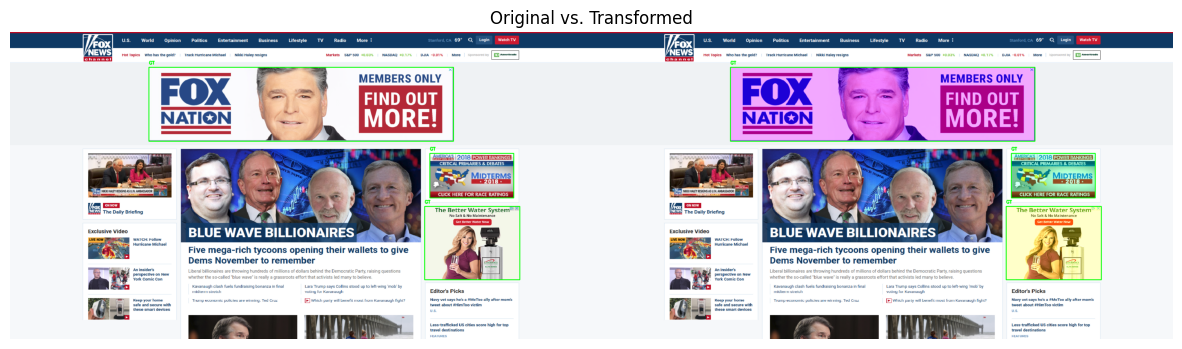

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def draw_boxes(image, boxes, color=(0, 255, 0), label='', fill=False):
    h, w = image.shape[:2]

    for box in boxes:
        x_center, y_center, width, height = box
        x_center, y_center, width, height = x_center * w, y_center * h, width * w, height * h

        top_left = int(x_center - width / 2), int(y_center - height / 2)
        bottom_right = int(x_center + width / 2), int(y_center + height / 2)

        if fill:
            image = cv2.rectangle(image, top_left, bottom_right, color, cv2.FILLED)
        else:
            image = cv2.rectangle(image, top_left, bottom_right, color, 2)

        if not fill and label:
            image = cv2.putText(image, label, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image

def visualize_comparison(original_image_path, transformed_image_path, gt_boxes_path, figsize=(15, 10)):
    original_image = cv2.imread(original_image_path)
    transformed_image = cv2.imread(transformed_image_path)
    gt_boxes = read_txt(gt_boxes_path)
    image_with_gt_on_original = draw_boxes(original_image, gt_boxes, color=(0, 255, 0), label='GT', fill=False)
    image_with_gt_on_transformed = draw_boxes(transformed_image, gt_boxes, color=(0, 255, 0), label='GT', fill=False)

    combined_image = np.hstack((image_with_gt_on_original, image_with_gt_on_transformed))
    plt.figure(figsize=figsize)
    plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Original vs. Transformed")
    plt.axis('off')
    plt.show()

original_image_path = '/content/drive/MyDrive/mlcyberdata/page_based/web/test/images/foxnews.png'
transformed_image_path = '/content/drive/MyDrive/mlcyberdata/colorshift/images/foxnews.png'
gt_boxes_path = '/content/drive/MyDrive/mlcyberdata/page_based/web/test/labels/foxnews.txt'

visualize_comparison(original_image_path, transformed_image_path, gt_boxes_path, figsize=(15, 10))


## Ground Truth vs Predictions

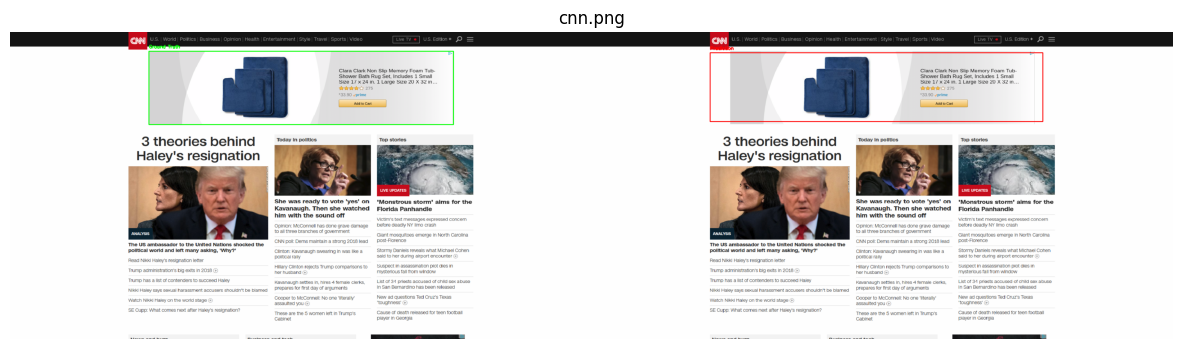

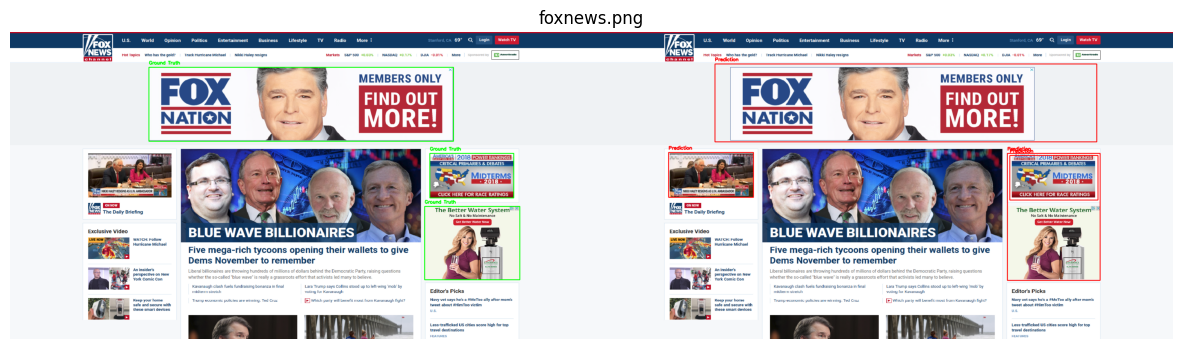

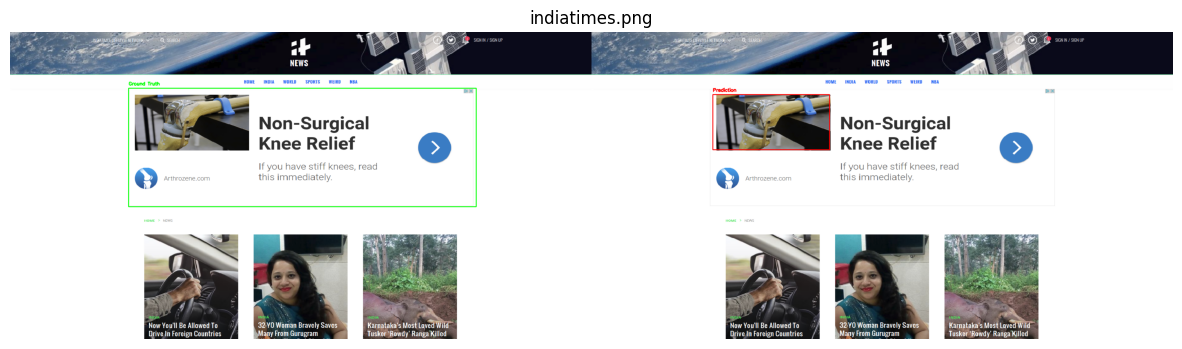

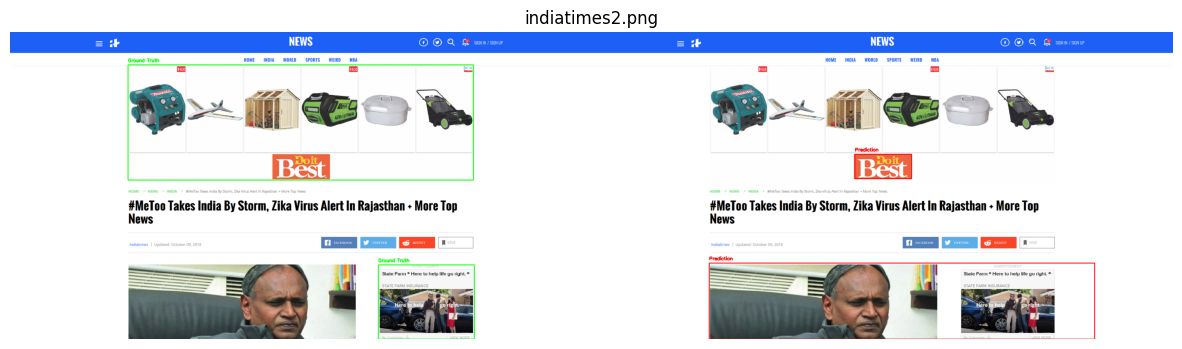

In [18]:
import cv2
import matplotlib.pyplot as plt

def draw_boxes(image_path, boxes, color=(0, 255, 0), label='', fill=False):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]

    for box in boxes:
        x_center, y_center, width, height = box
        x_center, y_center, width, height = x_center * w, y_center * h, width * w, height * h

        top_left = int(x_center - width / 2), int(y_center - height / 2)
        bottom_right = int(x_center + width / 2), int(y_center + height / 2)

        if fill:
            image = cv2.rectangle(image, top_left, bottom_right, color, cv2.FILLED)
        else:
            image = cv2.rectangle(image, top_left, bottom_right, color, 2)

        if not fill:
            image = cv2.putText(image, label, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image

def visualize_predictions(image_dir, gt_dir, pred_dir, num_examples=3, figsize=(15, 10)):
    image_files = os.listdir(image_dir)[:num_examples]

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        gt_boxes = read_txt(os.path.join(gt_dir, image_file.replace('.png', '.txt')))
        try:
          pred_boxes = read_txt(os.path.join(pred_dir, image_file.replace('.png', '.txt')))
        except:
          continue

        image_with_gt = draw_boxes(image_path, gt_boxes, color=(0, 255, 0), label='Ground Truth')
        image_with_pred = draw_boxes(image_path, pred_boxes, color=(0, 0, 255), label='Prediction')

        combined_image = np.hstack((image_with_gt, image_with_pred))

        plt.figure(figsize=figsize)
        plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
        plt.title(image_file)
        plt.axis('off')
        plt.show()

image_directory = '/content/drive/MyDrive/mlcyberdata/page_based/web/test/images'
ground_truth_directory = '/content/drive/MyDrive/mlcyberdata/page_based/web/test/labels'
predicted_directory = '/content/yolov5/runs/detect/resize/labels'

visualize_predictions(image_directory, ground_truth_directory, predicted_directory, 5, figsize=(15, 10))